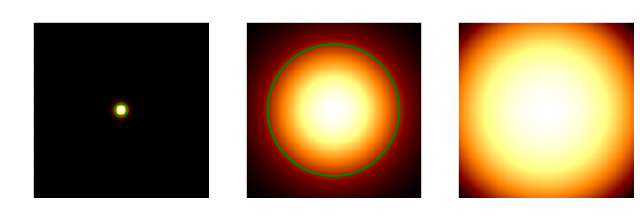

In [14]:
import numpy as np
from astropy.coordinates import Angle
import matplotlib.pyplot as plt
from gammapy.maps import WcsGeom, Map
from gammapy.modeling.models import (
    GaussianSpatialModel,
    Models,
    PowerLawSpectralModel,
    SkyModel,
)
sigma_range = [.1, 1, 10]
tags = [r"$\sigma=$"+str(sigma_range[0]), r"$\sigma=$"+str(sigma_range[1]), r"$\sigma=$"+str(sigma_range[2])]
phi = Angle("0 deg")

geom = WcsGeom.create(
    skydir=(2,2), frame="galactic", width=(4, 4), binsz=0.02
)

# illustrate size parameter
fig, axes = plt.subplots(1, 3, figsize=(9, 6))
for ax, sigma, tag in zip(axes, sigma_range, tags):
    
    model = GaussianSpatialModel(
        lon_0="2 deg",
        lat_0="2 deg",
        sigma=f"{sigma} deg",
        e=0.001,
        phi=phi,
        frame="galactic",
    )
    meval = model.evaluate_geom(geom)
    Map.from_geom(geom=geom, data=meval.value, unit=meval.unit).plot(ax=ax)
    pixreg = model.to_region().to_pixel(geom.wcs)
    pixreg.plot(ax=ax, edgecolor="g", facecolor="none", lw=2)
    ax.set_title(tag)

plt.tight_layout()